Q_out_j/Vs: 0.003333
*** F INFO ***
f: 1.0
*** CASTER INFO ***
cast speed: 2.40 [m/min], cast_speed: 0.04000 [m/s],section side: 0.160 [m], number of strands: 7
*** FLOW RATE INFO ***
Q_in: 0.000000 [m3/s], Q_out_j: 0.001024 [m3/s/strand], Q_out: 0.007168 [m3/s]
*** DENSITY INFO ***
rho_new: 7650.0, rho_old: 7660.0, rho_out: 7660.0
*** TIME INFO ***
current simulation time (t): 0.0 [s] - 0.0 [min],time increment (dt): 1.0 [s]
number of time steps: 1
*** TUNDISH INFO ***
M_td: 15000.0 [kg], M_td_max: 35000.0 [kg], M_td_min: 15000.0 [kg]
*** CONCENTRATION INFO ***
C_in: 1.0, C_out: 0.0, C_ave: 0.0

 Filling the tundish to the max tundish weigth:

*** TIME INFO ***
current simulation time (t): 242.0 [s] - 4.0 [min],time increment (dt): 1.0 [s]
number of time steps: 243
*** FLOW RATE INFO ***
Q_in: 0.008000 [m3/s], Q_out_j: 0.001024 [m3/s/strand], Q_out: 0.007168 [m3/s]
*** TUNDISH INFO ***
M_td: 35003.2 [kg], M_td_max: 35000.0 [kg], M_td_min: 15000.0 [kg]
*** CONCENTRATION INFO ***
C_in: 

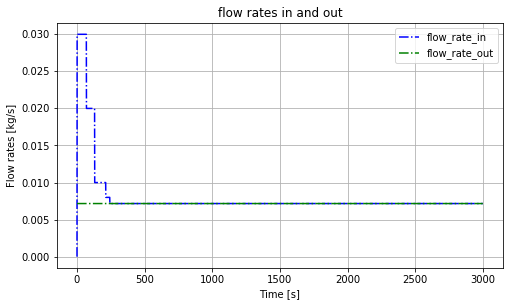

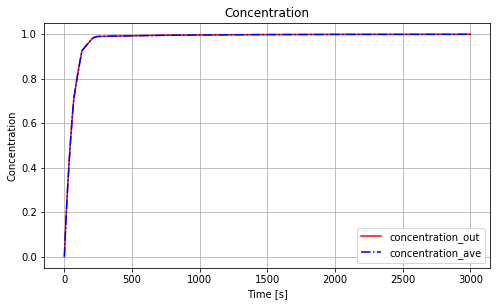

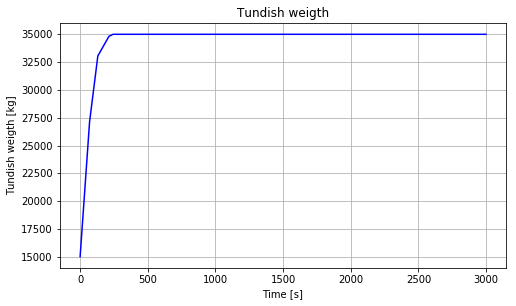

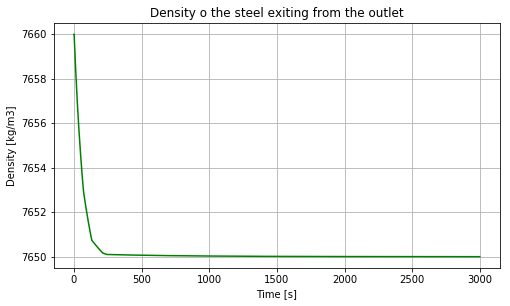

In [36]:
################################################################################
#  SIMPLE TUNDISH MIXING MODEL OF CONTINUOUS CASTING DURING A GRADE TRANSITION
#           Myung Jong CHO and In Cheol KIM, ISIJ, 2006, n. 10
#
#  IMPLEMENTATION OF THE 
#
#               TUDISH MIXING MODEL (TMM)
#
#
# Rev. 04
#
#
################################################################################

class bcolors:
    HEADER    = '\033[95m'
    OKBLUE    = '\033[94m'
    OKGREEN   = '\033[92m'
    WARNING   = '\033[93m'
    FAIL      = '\033[91m'
    ENDC      = '\033[0m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'

    
################################################################################
#                         OBTAIN THE STARTING VALUES
# Step 1:
################################################################################

##
## parameters used for the TMM (Tundish Mixing Model)
##

# mass of the tundish (max_value) [kg]
M_td_max  = 35 * 1000
# mass of the tundish (min_value reached during the change of ladle) [kg]
M_td_min  = 15 * 1000 
# mass of the tundish (initial value) [kg]
M_td      = M_td_min
# time increment [s]
dt        = 1
# casting speed [m/min]
c_speed   = 2.4
# section side [m]
side      = 160 / 1000 
# number of strands
n_strands = 7
# in-flow mass flow rate [m3/s]
Q_in      = 0                                 #initial condition: slide gate is closed
# density of the new steel grade [kg/m3]
rho_new    = 7650 
# density of the old steel grade [kg/m3]
rho_old    = 7660 
# inlet concentration 
C_in       = 1
# outlet concentration
C_out      = 0
# average concentration inside the tundish (initial value)
C_ave      = 0
# optimized scale factor
f_opt      = 1



################################################################################
#                       COMPUTE ADDITIONAL QUANTITIES
################################################################################

##
## TMM ( Tundish Mixing Model )
##

# density of the steel coming out from the tundish
rho_out = rho_old         # initialization

# casting speed [m/s]
cast_speed = c_speed / 60

section = side ** 2
# out-flow mass flow rate for a single tundish exit [m3/s/strand]
Q_out_j = section * cast_speed
# total out-flow mass [m3/s]
Q_out = Q_out_j * n_strands


##
## SMB ( Strand Mixing Box )
##

# average concentration of the specie in the box
C_strand_out = C_out
# mixing box length [m]
Ls = 12
# volume of the mixing box [m3]
Vs = section * Ls
print ("Q_out_j/Vs: %6f" % (Q_out_j/Vs))

################################################################################
#                   CREATE THE LISTS USED TO PLOT RESULTS
# (DS implementation detail: List comprehension was used)
# https://docs.python.org/3.6/tutorial/datastructures.html
################################################################################
t = []        
t.append(0)                         # initial time set to zero s

tundish_mass = []                   
tundish_mass.append(M_td)

steel_density_out = []
steel_density_out.append(rho_out)

concentration_out = []               
concentration_out.append(C_out)

concentration_ave = []  
concentration_ave.append(C_ave)

concentration_strand_out = []
concentration_strand_out.append(C_strand_out)

flow_rate_in = []
flow_rate_in.append(Q_in)

flow_rate_out = []
flow_rate_out.append(Q_out)

################################################################################
#                       COMPUTE ADDITIONAL QUANTITIES
################################################################################
def info_time():
    print(bcolors.BOLD + bcolors.FAIL +
          "*** TIME INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "current simulation time (t): %.1f [s] - %.1f [min],\
time increment (dt): %.1f [s]\nnumber of time steps: %d" % 
          (t[-1], t[-1]/60, dt, len(t)) + 
         bcolors.ENDC)

def info_tundish():
    print(bcolors.BOLD + bcolors.FAIL +
          "*** TUNDISH INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "M_td: %.1f [kg], M_td_max: %.1f [kg], M_td_min: %.1f [kg]" % 
          (M_td, M_td_max, M_td_min) + 
          bcolors.ENDC)

def info_caster():
    print(bcolors.BOLD + bcolors.FAIL +
          "*** CASTER INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "cast speed: %.2f [m/min], cast_speed: %.5f [m/s],\
section side: %.3f [m], number of strands: %d" % 
          (c_speed, cast_speed, side, n_strands) + 
          bcolors.ENDC)

def info_flow_rate():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** FLOW RATE INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "Q_in: %.6f [m3/s], Q_out_j: %.6f [m3/s/strand], Q_out: %.6f [m3/s]" % 
          (Q_in, Q_out_j, Q_out) + 
          bcolors.ENDC)

def info_density():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** DENSITY INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "rho_new: %.1f, rho_old: %.1f, rho_out: %.1f" % 
          (rho_new, rho_old, rho_out) + 
          bcolors.ENDC)

def info_concentration():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** CONCENTRATION INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "C_in: %.1f, C_out: %.1f, C_ave: %.1f" % 
          (C_in, C_out, C_ave) + 
          bcolors.ENDC)

def info_f():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** F INFO ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "f: %.1f" % 
          (f_opt) + 
          bcolors.ENDC)


################################################################################
#                     DEFINITION OF THE FUNCTIONS
################################################################################
def M_td_fun(dt, M_td, rho_new, rho_out, Q_in, Q_out):
    """update the mass of the tundish"""
    M_td = M_td + (rho_new * Q_in * dt) - (Q_out * rho_out * dt)
    tundish_mass.append(M_td)
    return M_td

def rho_out_fun(C_out, rho_new, rho_old):
    """update the density of the outcoming steel"""
    rho_out = C_out * rho_new + (1 - C_out) * rho_old
    steel_density_out.append(rho_out)
    return rho_out

def C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_new, rho_out):
    """update the average conentration value"""
    C_ave = (M_td * C_ave + Q_in * rho_new * dt * C_in) / M_td -\
            (Q_out * rho_out * dt * C_out) / M_td
    concentration_ave.append(C_ave)
    return C_ave

def C_out_fun(f_opt, C_ave, C_in, C_out):
    """update the output concentration"""
    C_out = f_opt * C_ave + (1 - f_opt) * C_in
    concentration_out.append(C_out)
    return C_out

def flow_rate_update(Q_in, Q_out):
    """lists useful to plot results"""
    flow_rate_in.append(Q_in)
    flow_rate_out.append(Q_out)
    
def C_strand_out_fun(Q_out_j, Vs, C_out, C_strand_out, dt):
    C_strand_out =  (C_out - C_strand_out) * dt # Q_out_j / Vs
    concentration_strand_out.append(C_strand_out)
    return C_strand_out
    

################################################################################
#                          PRINT THE START CONDITIONS
################################################################################
info_f()
info_caster()
info_flow_rate()
info_density()
info_time()
info_tundish()
info_concentration()


################################################################################
#                            RUN THE SIMULATION CASE
#
################################################################################

# this simulation considers the filling of the tundish after ladle change

################################################################################
#               TUNDISH FILLING AFTER LADLE CHANGE
################################################################################
# in-flow mass flow rate [m3/s]
#Q_in     = 0.016   # filling flow rate

C_target_10 = 0.1     # target concentration value to meet
time_10     = 0       # initialize the value
delta       = .01     # delta value used to find the time corresponding to the target concentration
C_target_90 = 0.9     # target concentration value to meet
time_90     = 0       # initialize the value

print(bcolors.BOLD + bcolors.WARNING + "\n Filling the tundish to the max tundish weigth:\n" 
      + bcolors.ENDC)

while ( M_td < M_td_max ):
    if   (M_td < M_td_max - 20000):
        Q_in     = Q_in + 0.0002
    elif (M_td < M_td_max - 8000):
        Q_in     = 0.03
    elif (M_td < M_td_max - 2000):
        Q_in     = 0.02 
    elif (M_td < M_td_max - 200): 
        Q_in     = 0.01
    elif (M_td < M_td_max - 100): 
        Q_in     = 0.008    
    # Step 2:
    M_td = M_td_fun(dt, M_td, rho_new, rho_out, Q_in, Q_out)
    rho_out = rho_out_fun(C_out, rho_new, rho_old)
    # Step 3:
    C_ave = C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_new, rho_out)
    # Step 4:
    C_out = C_out_fun(f_opt, C_ave, C_in, C_out)
    # Step 5:
    C_strand_out = C_strand_out_fun(Q_out_j, Vs, C_out, C_strand_out, dt)
    flow_rate_update(Q_in, Q_out)
    if C_out < (C_target_10 + delta) and C_out > (C_target_10 - delta):
        time_10 = t[-1]
    if C_out < (C_target_90 + delta) and C_out > (C_target_90 - delta):
        time_90 = t[-1]
    t.append(t[-1] + dt) 


info_time()
info_flow_rate()
info_tundish()
info_concentration()

print(bcolors.BOLD + bcolors.OKGREEN + 
      "\n time to reach the final concentration of %.1f: %.1f [s] = %.1f [min] \n" 
      % (C_target_10, time_10, time_10/60) +
     bcolors.ENDC)

time_to_fill_the_tundish = t[-1]
print(bcolors.BOLD + bcolors.OKGREEN + "\n Tundish filling time: %.1f [s] = %.1f [min] \n"
      % (time_to_fill_the_tundish, time_to_fill_the_tundish/60) +  bcolors.ENDC)

################################################################################
#               ITERATE UNTIL 3000 s
################################################################################

Q_in = Q_out     # steady state, in-flow mass flow rate [m3/s]

print(bcolors.BOLD + bcolors.WARNING + "\n Run the simulation up to 3000 s:\n" 
      + bcolors.ENDC)

while (len(t) < 3000):
    # Step 2:
    M_td = M_td_fun(dt, M_td, rho_new, rho_out, Q_in, Q_out)
    rho_out = rho_out_fun(C_out, rho_new, rho_old)
    # Step 3:
    C_ave = C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_new, rho_out)
    # Step 4:
    C_out = C_out_fun(f_opt, C_ave, C_in, C_out)
    # Step 5:
    C_strand_out = C_strand_out_fun(Q_out_j, Vs, C_out, C_strand_out, dt)
    flow_rate_update(Q_in, Q_out)
    if C_out < (C_target_90 + delta) and C_out > (C_target_90 - delta):
        time_90 = t[-1]
    t.append(t[-1] + dt)  
    
    
info_time()
info_flow_rate()
info_tundish()
info_concentration()

print(bcolors.BOLD + bcolors.OKGREEN + 
      "\n time to reach the final concentration of %.1f: %.1f [s] = %.1f [min] \n" 
      % (C_target_90, time_90, time_90/60) +
     bcolors.ENDC)

# mixed steel length (sum for all the strands) [m]
mixed_steel_length = time_90 * cast_speed
# mixed steel volume [m3]
mixed_steel_vol = section * mixed_steel_length
# mixed steel weigth [kg]
mixed_steel_weigth = mixed_steel_vol * 7850

print("Mixed steel length (total): %.1f [m]\n" % (mixed_steel_length))
print("Mixed steel volume: %.1f [m3]\n"        % (mixed_steel_vol))
print("Mixed steel weigth: %.1f [kg]\n"        % (mixed_steel_weigth))


################################################################################
#               PLOT THE RESULTS
################################################################################
import matplotlib.pyplot as plt
#import PyQt5
#%matplotlib qt
%matplotlib inline

def max_of_two_lists(la, lb):
    return max(max(la), max(lb))

#plt.figure(1)
plt.figure(figsize=(8,4.5))
plt.title('flow rates in and out')
line, = plt.plot(t, flow_rate_in, '-.b', label='flow_rate_in')
line, = plt.plot(t, flow_rate_out, '-.g', label='flow_rate_out')
plt.ylabel('Flow rates [kg/s]')
plt.xlabel('Time [s]')
#plt.axis([0, t[-1], 0, max_of_two_lists(flow_rate_in, flow_rate_out)])
plt.legend()
plt.grid()
plt.show()

#plt.figure(2)
plt.figure(figsize=(8,4.5))
plt.title('Concentration')
plt.plot(t, concentration_out , 'r', label='concentration_out')
plt.plot(t, concentration_ave , '-.b', label='concentration_ave')
#plt.plot(t, concentration_strand_out , '-.k', label='concentration_strand_out')
plt.ylabel('Concentration')
plt.xlabel('Time [s]')
#plt.axis([0, t[-1], 0, max_of_two_lists(concentration_out, concentration_ave)])
plt.legend()
plt.grid()
plt.show()

#plt.figure(3)
plt.figure(figsize=(8,4.5))
plt.title('Tundish weigth')
plt.plot(t, tundish_mass , 'b')
plt.ylabel('Tundish weigth [kg]')
plt.xlabel('Time [s]')
#plt.axis([0, t[-1], M_td_min, max(tundish_mass)])
plt.grid()
plt.show()

#plt.figure(4)
plt.figure(figsize=(8,4.5))
plt.title('Density o the steel exiting from the outlet')
plt.plot(t, steel_density_out , 'g')
plt.ylabel('Density [kg/m3]')
plt.xlabel('Time [s]')
plt.grid()
plt.show()


In [15]:
plt.close("all")

In [28]:
print(C_in, C_out)
print(len(t))
max(concentration_out)

1 0.9993370018462846
3000


0.9993370018462846